# <span style="color:RED;"><strong>📘 Proyecto de Ciencia de Datos</strong></span>
**Definición de la base de datos y visualización básica**

Nataly Rodriguez Atehortua - nataly.rodriguez1@udea.edu.co

## <span style="color:#1a73e8;"><strong>Preparación de la fuente de datos y librerías</strong></span>

In [41]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [42]:
# DataFrame 
df = pd.read_csv('../datos/features_with_metaData.csv')
df.head()

,spo2_mean,spo2_std,spo2_var,spo2_mode,spo2_min,spo2_max,airflow_mean,airflow_median,airflow_std,airflow_mean_PSD_0_0.1,...,skewness_rr,hrv_total_power,hrv_lf_power,hrv_hf_power,hrv_lf_hf_ratio,hrv_shannon_entropy,label,subject,Age,Sex
0,96.701000,1.695563,2.874932,98.0,93.0,98.0,0.030024,0.057825,0.184668,0.041587,...,0.070594,0.004022,0.001222,0.000953,1.282583,2.385949,N,a01,51,M
1,97.350000,0.678602,0.460500,98.0,96.0,98.0,0.022421,0.026675,0.138686,0.020508,...,-0.418282,0.002435,0.000894,0.000721,1.238604,2.707965,N,a01,51,M
2,98.368667,0.773575,0.598418,99.0,97.0,100.0,0.037414,0.113125,0.324112,0.235710,...,0.088838,0.005727,0.001135,0.001101,1.030521,2.332296,N,a01,51,M
3,99.000000,0.000000,0.000000,99.0,99.0,99.0,0.002367,0.009575,0.261016,0.106126,...,-0.652262,0.003871,0.000959,0.000322,2.982284,2.037821,N,a01,51,M
4,98.132833,0.426054,0.181522,98.0,97.0,99.0,0.020547,0.058950,0.175053,0.076721,...,0.276769,0.002300,0.001328,0.000298,4.459743,2.444649,N,a01,51,M


## <span style="color:#1a73e8;"><strong>1. Introducción</strong></span>

<b>1. Presentación del problema o pregunta de investigación.</b> 

La apnea obstructiva del sueño (AOS) es un trastorno respiratorio de alta prevalencia, caracterizado por episodios recurrentes de colapso parcial (hipopnea) o total (apnea) de las vías aéreas superiores durante el sueño, generando una interrupción del flujo de aire hacia los pulmones por al menos 10 segundos. Estos eventos provocan fluctuaciones en la saturación de oxígeno, fragmentación del sueño y alteraciones en la fisiología cardiovascular, incrementando el riesgo de hipertensión, enfermedad coronaria y accidentes cerebrovasculares.

La pregunta de investigación presentada es: ¿Qué patrones fisiológicos permiten identificar la presencia de eventos respiratorios (apnea e hipopnea) a partir de señales de flujo respiratorio, variabilidad cardíaca y saturación de oxígeno, considerando que las épocas analizadas están etiquetadas según la ocurrencia o no de dichos eventos?. Esta línea de estudio busca superar las limitaciones de los métodos tradicionales, los cuales requieren polisomnografía en entornos hospitalarios, un procedimiento costoso y de difícil acceso para gran parte de la población

<b> 2. Contexto:</b>  ¿por qué es relevante este problema?

Según los criterios diagnósticos establecidos por la American Academy of Sleep Medicine (AASM), una apnea corresponde a una reducción ≥90 % del flujo aéreo con respecto al valor basal, mientras que una hipopnea implica una disminución ≥30 % de la señal de presión nasal, acompañada de una desaturación ≥4 % [1].

En Colombia, entre 2017 y 2021, se diagnosticaron 363.204 casos de apnea del sueño, lo que representa una prevalencia de 21,67 por cada mil habitantes mayores de 50 años. Los casos se concentran principalmente en Bogotá, Cundinamarca, Antioquia y Valle del Cauca, regiones que en conjunto agrupan el 83,1 % de los diagnósticos reportados en el país [2]. A nivel global, se estima que este trastorno afecta a aproximadamente 936 millones de adultos entre los 30 y 69 años [3].

La detección temprana de eventos respiratorios es relevante porque la AOS no tratada se asocia con un incremento significativo en la mortalidad cardiovascular, deterioro cognitivo, somnolencia diurna excesiva y reducción en la calidad de vida.


<b> 3. Relación entre el problema y la base de datos seleccionada. </b>  

Para abordar esta pregunta, utilizamos la base de datos **[Apnea-ECG](https://physionet.org/content/apnea-ecg/1.0.0/) [4]** disponible en PhysioNet. Esta base de datos recopila información de 8 registros con una duración entre 7 y 10 horas cada uno. Las señales disponibles incluyen:

- **ECG**
- **Saturación de oxígeno (SpO₂)**
- **Flujo oro-nasal** (medido mediante termistores)

Cada registro fue segmentado en épocas de 60 segundos, las cuales están etiquetadas según la presencia o ausencia de eventos respiratorios. Esta estructura permite realizar análisis comparativos entre períodos con y sin eventos



## <span style="color:#1a73e8;"><strong>2. Descripción de la base de datos</strong></span>


<b> 1. Número de registros y variables.</b><br>

A partir de cada una de las señales segmentadas recopiladas en el DataSet, se extrajeron características relevantes en el dominio temporal y frecuencial:

### Señal ECG:
- **Dominio temporal**: promedio, mediana, varianza, RMSSD (raíz cuadrada de la media de las diferencias cuadráticas sucesivas), desviación estándar, varianza del cociente entre RR consecutivos, curtosis y asimetría.
- **Dominio frecuencial (HRV)**: entropía de Shannon, potencia espectral total, y la razón entre las bandas de baja frecuencia (LF: 0.04–0.15 Hz) y alta frecuencia (HF: 0.15–0.40 Hz), expresada como LF/HF.

### Señal SpO₂:
- **Dominio temporal**: promedio, desviación estándar, varianza, moda, valor mínimo y máximo por época.

### Señal de flujo respiratorio:
- **Dominio temporal**: promedio, mediana y desviación estándar.
- **Dominio frecuencial**: densidad espectral de potencia (PSD) y medias del espectro en los rangos 0–0.1 Hz y 0.4–0.5 Hz (`mean_PSD0_0.1` y `mean_PSD0.4_0.5`).

Todas las características extraídas por épocas de 60 segundos, junto con la información de metadatos de los 8 sujetos (género y edad), fueron consolidadas en un archivo `.csv` denominado **`features_with_metaData.csv`**. En este archivo:

- Cada **fila** corresponde a una época (minuto) de señal procesada.
- Cada **columna** representa una característica extraída.
- Se incluye una columna llamada **`subject`** que identifica a qué registro/sujeto pertenece cada muestra.
- Se añaden las columnas **`Age`** y **`sex`**, que indican la edad y el sexo de cada sujeto.
- Se añade la columna de **etiquetas (`label`)** proveniente de la base de datos original:
  - `"A"` indica que al inicio del minuto hay un evento de **apnea**.
  - `"N"` indica que **no** hay un evento de apnea.

### Distribución de clases:
- `N` (sin apnea): 2311 instancias  
- `A` (con apnea): 1587 instancias



In [43]:
# Visualizar una pequeña muestra de los datos
df.head()

,spo2_mean,spo2_std,spo2_var,spo2_mode,spo2_min,spo2_max,airflow_mean,airflow_median,airflow_std,airflow_mean_PSD_0_0.1,...,skewness_rr,hrv_total_power,hrv_lf_power,hrv_hf_power,hrv_lf_hf_ratio,hrv_shannon_entropy,label,subject,Age,Sex
0,96.701000,1.695563,2.874932,98.0,93.0,98.0,0.030024,0.057825,0.184668,0.041587,...,0.070594,0.004022,0.001222,0.000953,1.282583,2.385949,N,a01,51,M
1,97.350000,0.678602,0.460500,98.0,96.0,98.0,0.022421,0.026675,0.138686,0.020508,...,-0.418282,0.002435,0.000894,0.000721,1.238604,2.707965,N,a01,51,M
2,98.368667,0.773575,0.598418,99.0,97.0,100.0,0.037414,0.113125,0.324112,0.235710,...,0.088838,0.005727,0.001135,0.001101,1.030521,2.332296,N,a01,51,M
3,99.000000,0.000000,0.000000,99.0,99.0,99.0,0.002367,0.009575,0.261016,0.106126,...,-0.652262,0.003871,0.000959,0.000322,2.982284,2.037821,N,a01,51,M
4,98.132833,0.426054,0.181522,98.0,97.0,99.0,0.020547,0.058950,0.175053,0.076721,...,0.276769,0.002300,0.001328,0.000298,4.459743,2.444649,N,a01,51,M


In [44]:
# Contar el número de ocurrencias de cada valor único en la columna 'label'
label_counts = df['label'].value_counts()

print("Label counts:")
print(label_counts)

Label counts:
label
N    2311
A    1587
Name: count, dtype: int64


El dataset presentado contiene un total de **3.898 filas** y **28 variables (columnas)**.

<b> 2. Tipos de datos.</b><br>

### Tipos de datos por variable:
- **float64 (24 columnas):** Corresponden a las características extraídas de cada señal segmentada.  
- **object (3 columnas):** Incluyen:
  - `sex`: Género del sujeto.
  - `label`: Etiqueta que indica la presencia o ausencia de un evento de apnea.
  - `subject`: Identificador único del sujeto.  
- **int64 (1 columna):** Corresponde a la columna `Age`, que indica la edad del sujeto.  

In [45]:
# --- DataFrame info ---
print("=== DataFrame Info ===")
df.info()

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spo2_mean                 3898 non-null   float64
 1   spo2_std                  3898 non-null   float64
 2   spo2_var                  3898 non-null   float64
 3   spo2_mode                 3898 non-null   float64
 4   spo2_min                  3898 non-null   float64
 5   spo2_max                  3898 non-null   float64
 6   airflow_mean              3897 non-null   float64
 7   airflow_median            3897 non-null   float64
 8   airflow_std               3897 non-null   float64
 9   airflow_mean_PSD_0_0.1    3897 non-null   float64
 10  airflow_mean_PSD_0.4_0.5  3897 non-null   float64
 11  mean_rr                   3895 non-null   float64
 12  median_rr                 3895 non-null   float64
 13  var_rr                    3888 non-null 

In [46]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 3898
Número de variables: 28


In [47]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
float64    24
object      3
int64       1
Name: count, dtype: int64


In [48]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))


🔹 Variables categóricas:
- label
- subject
- Sex

🔸 Variables numéricas:
- spo2_mean
- spo2_std
- spo2_var
- spo2_mode
- spo2_min
- spo2_max
- airflow_mean
- airflow_median
- airflow_std
- airflow_mean_PSD_0_0.1
- airflow_mean_PSD_0.4_0.5
- mean_rr
- median_rr
- var_rr
- rmssd
- std_rr
- var_rr_ratio
- kurtosis_rr
- skewness_rr
- hrv_total_power
- hrv_lf_power
- hrv_hf_power
- hrv_lf_hf_ratio
- hrv_shannon_entropy
- Age


### **Análisis descriptivo**

In [49]:
# --- Estadísticas descriptiva ---
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

print("\n=== Descriptive Statistics ===")
display(df.describe())


=== Descriptive Statistics ===


,spo2_mean,spo2_std,spo2_var,spo2_mode,spo2_min,spo2_max,airflow_mean,airflow_median,airflow_std,airflow_mean_PSD_0_0.1,airflow_mean_PSD_0.4_0.5,mean_rr,median_rr,var_rr,rmssd,std_rr,var_rr_ratio,kurtosis_rr,skewness_rr,hrv_total_power,hrv_lf_power,hrv_hf_power,hrv_lf_hf_ratio,hrv_shannon_entropy,Age
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3895.000000,3895.000000,3888.000000,3888.000000,3888.000000,3881.000000,3878.000000,3881.000000,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000,3898.000000
mean,90.673924,3.609467,43.816697,91.665726,83.757568,95.772191,-0.000079,0.008052,0.205869,0.035400,0.037644,1.007524,0.968380,0.411663,0.202580,0.180577,0.155753,3.241680,0.566617,0.259645,0.052335,0.016633,2.959742,2.252458,43.345818
std,8.003352,5.549446,181.030648,10.432739,18.065529,2.968646,0.049016,0.100144,0.093263,0.043219,0.064296,0.593328,0.508954,8.378773,0.944554,0.615754,2.232655,8.833211,1.668435,3.840789,0.621893,0.130878,4.868152,0.570195,7.808456
min,0.868667,0.000000,0.000000,0.000000,0.000000,73.000000,-0.146342,-0.192750,0.044301,0.000394,0.000000,0.561667,0.525000,0.000025,0.007022,0.005000,0.000077,-1.729269,-6.426924,0.000032,0.000000,0.000003,0.000000,0.102806,31.000000
25%,88.539000,0.465438,0.216633,92.000000,78.000000,95.000000,-0.044543,-0.083100,0.128043,0.005415,0.005818,0.888346,0.840000,0.003226,0.034400,0.056801,0.001252,-0.600294,-0.243205,0.002294,0.000415,0.000182,0.769750,1.799111,38.000000
50%,94.106583,0.906393,0.821550,95.000000,92.000000,96.000000,-0.021559,-0.007325,0.197324,0.018338,0.014078,0.965082,0.950000,0.008995,0.066769,0.094840,0.004290,-0.013425,0.241646,0.007467,0.001498,0.000806,1.656450,2.321901,44.000000
75%,95.383667,5.704944,32.546392,96.000000,95.000000,97.000000,0.042549,0.089300,0.263943,0.051894,0.037314,1.047895,1.040000,0.025721,0.139948,0.160377,0.018770,2.017785,0.986065,0.021007,0.004970,0.002996,3.572465,2.639976,52.000000
max,99.000000,47.556193,2261.591453,99.000000,99.000000,100.000000,0.159641,0.294750,0.679454,0.434127,0.617125,26.875000,26.875000,369.568689,35.130000,19.224169,108.705687,73.487668,8.586069,164.824451,19.847840,5.165253,192.021985,3.837433,54.000000


Se realizó un análisis descriptivo de las variables numéricas del conjunto de datos, identificando tendencias centrales, dispersión y valores atípicos. En términos generales, se observa que algunas variables presentan una alta variabilidad y valores máximos que exceden considerablemente la media.

Por ejemplo, la variable spo2_var muestra una media de 43.81 y un valor máximo de 2261.59, indicando una gran dispersión en la variabilidad del nivel de saturación de oxígeno. De manera similar, varias características derivadas de los intervalos RR, como var_rr, kurtosis_rr y skewness_rr, presentan valores máximos que superan ampliamente el promedio, reflejando distribuciones altamente asimétricas.

En contraste, variables como spo2_mean, spo2_min y spo2_max muestran menor dispersión, con valores concentrados en rangos esperados para parámetros fisiológicos normales

## <span style="color:#1a73e8;"><strong>3. Análisis inicial de las variables</strong></span>

<b>1. Identificación de las variables clave.</b><br>

Se seleccionaron variables representativas de cada señal (SpO₂, flujo de aire y ECG) por su relación directa con los eventos de apnea e hipopnea.

#### **SpO₂**
- **`spo2_min`** → valor mínimo de saturación, indicador importante porque durante apneas pueden presentarse caídas en el oxígeno.  
- **`spo2_std`** → variabilidad en la saturación, que refleja cambios en la señal a lo largo de la época.

#### **Flujo de aire**
- **`airflow_median`** → representa el nivel central del flujo respiratorio.  
- **`airflow_std`** → mide la variabilidad del flujo, que puede diferir entre respiración normal y alterada.  
- **`airflow_mean_PSD_0_0.1`** → energía en el rango de bajas frecuencias, asociada con respiración lenta o interrumpida.

#### **ECG - HRV**
- **`median_rr`** y **`var_rr`** → describen la distribución y variabilidad de los intervalos RR.  
- **`rmssd`** → refleja cambios a corto plazo en el ritmo cardiaco, relacionados con la modulación autonómica.


In [50]:
variables_clave = ['spo2_min', 'spo2_std','airflow_median', 'airflow_std', 'airflow_mean_PSD_0_0.1','median_rr', 'var_rr','rmssd']

describe = df[variables_clave].describe()

print("\n=== Descriptive Statistics ===")
display(describe)


=== Descriptive Statistics ===


,spo2_min,spo2_std,airflow_median,airflow_std,airflow_mean_PSD_0_0.1,median_rr,var_rr,rmssd
count,3898.000000,3898.000000,3897.000000,3897.000000,3897.000000,3895.000000,3888.000000,3888.000000
mean,83.757568,3.609467,0.008052,0.205869,0.035400,0.968380,0.411663,0.202580
std,18.065529,5.549446,0.100144,0.093263,0.043219,0.508954,8.378773,0.944554
min,0.000000,0.000000,-0.192750,0.044301,0.000394,0.525000,0.000025,0.007022
25%,78.000000,0.465438,-0.083100,0.128043,0.005415,0.840000,0.003226,0.034400
50%,92.000000,0.906393,-0.007325,0.197324,0.018338,0.950000,0.008995,0.066769
75%,95.000000,5.704944,0.089300,0.263943,0.051894,1.040000,0.025721,0.139948
max,99.000000,47.556193,0.294750,0.679454,0.434127,26.875000,369.568689,35.130000


<b>2 Conteo de valores, tipos de datos y valores faltantes.</b><br>

In [51]:
# --- Valores Null por columna ---
print("\n=== Null Values per Column ===")
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])


=== Null Values per Column ===

Conteo de valores faltantes por variable:
hrv_lf_power                20
hrv_hf_power                20
hrv_total_power             20
kurtosis_rr                 20
hrv_shannon_entropy         20
hrv_lf_hf_ratio             20
skewness_rr                 17
var_rr_ratio                17
std_rr                      10
var_rr                      10
rmssd                       10
mean_rr                      3
median_rr                    3
airflow_mean_PSD_0_0.1       1
airflow_std                  1
airflow_median               1
airflow_mean                 1
airflow_mean_PSD_0.4_0.5     1
dtype: int64


In [52]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
airflow_mean_PSD_0_0.1      3897
airflow_std                 3897
airflow_mean                3896
airflow_mean_PSD_0.4_0.5    3896
std_rr                      3885
var_rr                      3885
skewness_rr                 3881
var_rr_ratio                3881
hrv_total_power             3878
kurtosis_rr                 3878
hrv_hf_power                3878
hrv_shannon_entropy         3878
hrv_lf_power                3876
hrv_lf_hf_ratio             3876
rmssd                       3821
airflow_median              3325
spo2_var                    3181
spo2_std                    3179
spo2_mean                   3075
mean_rr                     3038
median_rr                    172
spo2_min                      65
spo2_mode                     45
spo2_max                      28
subject                        8
Age                            8
label                          2
Sex                            2
dtype: int64


## <span style="color:#1a73e8;"><strong>4. Visualizaciones exploratorias básicas</strong></span>

<b> 1. Histogramas o gráficos de barras para variables numéricas y categóricas.</b><br>

- **Variables numéricas** (`spo2_min`, `spo2_std`, `airflow_median`, `airflow_std`, `airflow_mean_PSD_0_0.1`, `median_rr`, `var_rr`, `rmssd`):  
  - Histogramas para analizar la distribución de cada variable.  
  - Diagramas de caja (boxplots) para identificar la presencia de valores atípicos y la dispersión.  

- **Variable categórica** (`sexo`):  
  - Gráficos de barras para visualizar la frecuencia de cada categoría.


### **Visualización variables numéricas agrupadas según el estado: Apnea (A) o Sin evento (N)**

In [53]:
def plot_variable_by_group(df, col, group_col, color_map=None, group_labels=None):
    """
    Genera gráficos de violín y histogramas para una variable, agrupados por una columna categórica.

    Parámetros:
    - df: DataFrame que contiene los datos
    - col: Columna a graficar (variable numérica)
    - group_col: Columna categórica para agrupar
    - color_map: Diccionario que mapea cada grupo a un color
    - group_labels: Diccionario que mapea cada grupo a un nombre legible
    """
    import warnings
    # Ignorar todos los FutureWarnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    print(f"\n\033[1m{col.upper()} POR {group_col.upper()}\033[0m")  # Título en negrita

    # Crear un mapa de colores si no se proporciona
    if color_map is None:
        grupos_unicos = df[group_col].dropna().unique()
        colores_defecto = ["#b5ead7", "#ffdac1", "#c7ceea", "#ffdd99", "#c2e0ff"]  # Paleta pastel
        color_map = {grupo: colores_defecto[i % len(colores_defecto)] for i, grupo in enumerate(grupos_unicos)}

    # Gráfico de violín con Plotly
    fig_violin = go.Figure()
    for grupo in df[group_col].dropna().unique():
        nombre = f"{col} ({group_labels[grupo]})" if group_labels else f"{col} ({grupo})"
        fig_violin.add_trace(go.Violin(
            y=df[df[group_col] == grupo][col],
            name=nombre,
            box_visible=True,
            meanline_visible=True,
            line_color="black",
            fillcolor=color_map[grupo],
            opacity=0.6
        ))

    fig_violin.update_layout(
        title=dict(text=f"<b>Gráfico de violín de {col} por {group_col}</b>", font=dict(color="black")),
        yaxis_title="Valor",
        template="plotly_white"
    )
    fig_violin.show()

    # Histograma con boxplot
    num_bins = 50  # número de bins

    fig, axes = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": [0.5, 1]}, figsize=(15, 8))

    # Boxplot (arriba) con agrupamiento
    sns.boxplot(
        x=col,
        y=group_col,
        data=df,
        ax=axes[0],
        hue=group_col,
        palette=color_map,
        width=0.5,
        flierprops={'marker': 'o', 'color': 'black'},
        dodge=True
    )
    axes[0].set_ylabel("")  # eliminar etiqueta del eje y para más limpieza
    axes[0].legend_.remove() if axes[0].get_legend() else None  # eliminar leyenda duplicada y warning

    # Histograma (abajo) con agrupamiento
    sns.histplot(
        data=df,
        x=col,
        bins=num_bins,
        hue=group_col,
        palette=color_map,
        alpha=0.7,
        ax=axes[1],
        kde=True
    )

    # Títulos y etiquetas
    axes[1].set_title(f"Histograma de {col} por {group_col}", fontsize=14, fontweight="bold")
    axes[1].set_xlabel("Valor", fontsize=12)
    axes[1].set_ylabel("Frecuencia", fontsize=12)

    # Mejorar layout y estética
    sns.despine(left=True)
    plt.tight_layout()

    # Mostrar plot
    plt.show()


SPO2_MIN POR LABEL


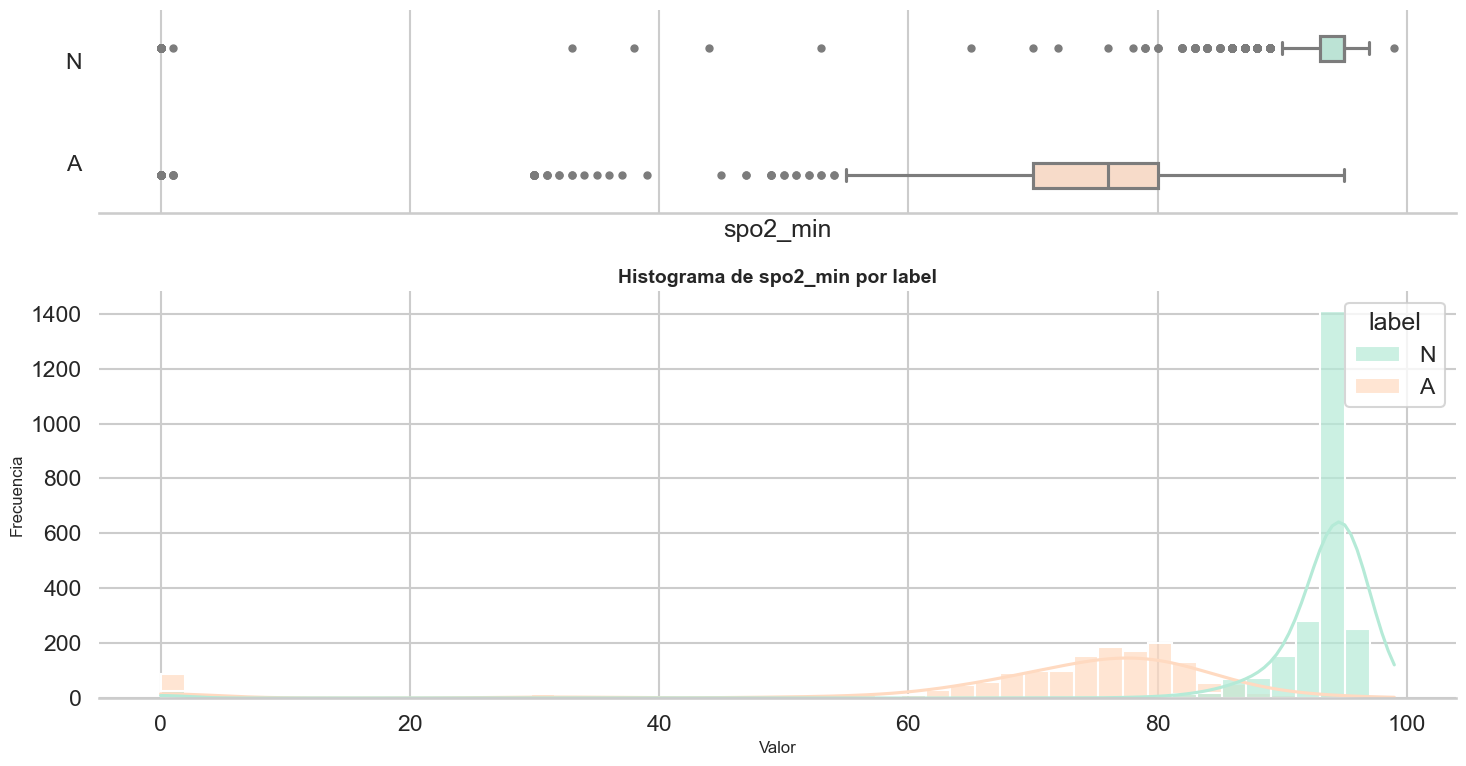


SPO2_STD POR LABEL


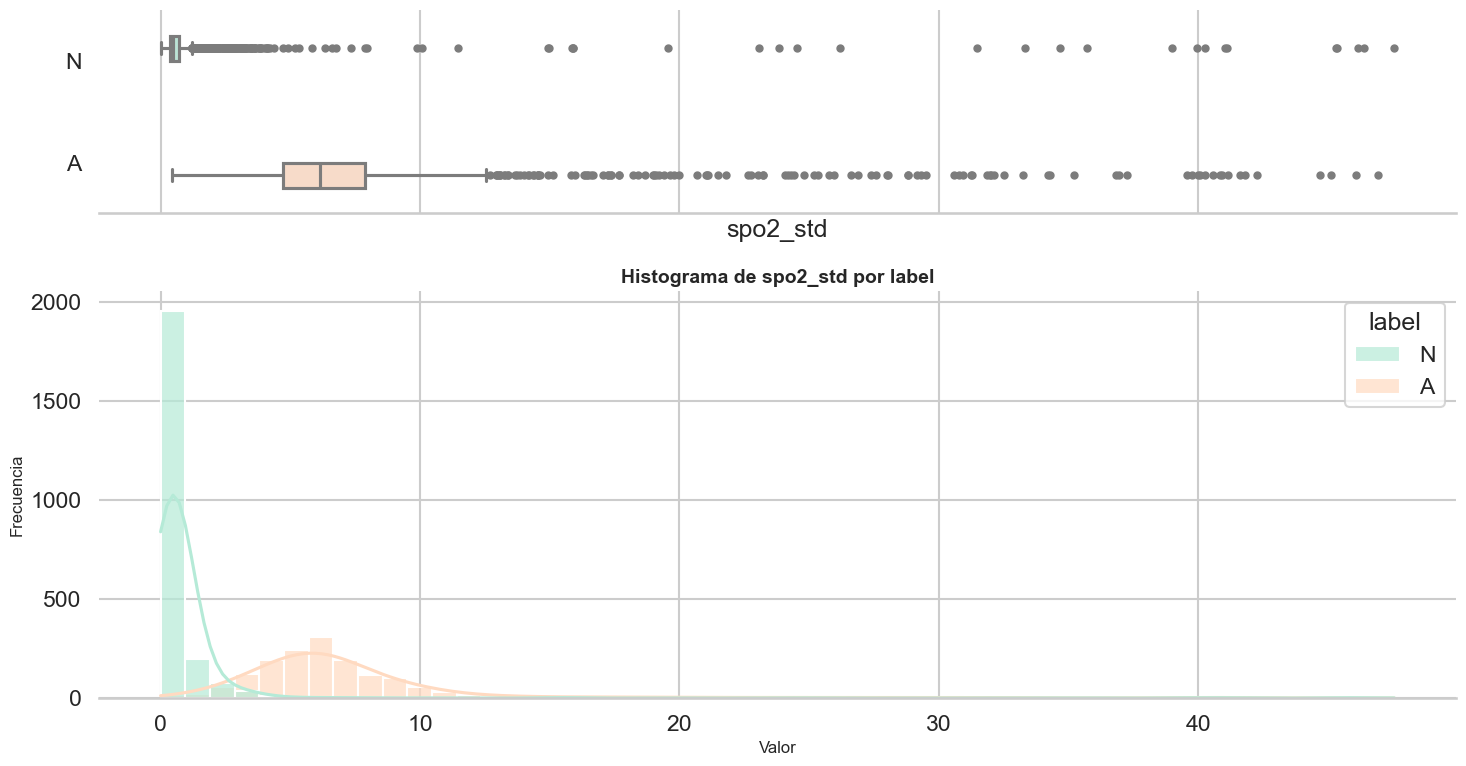


AIRFLOW_MEDIAN POR LABEL


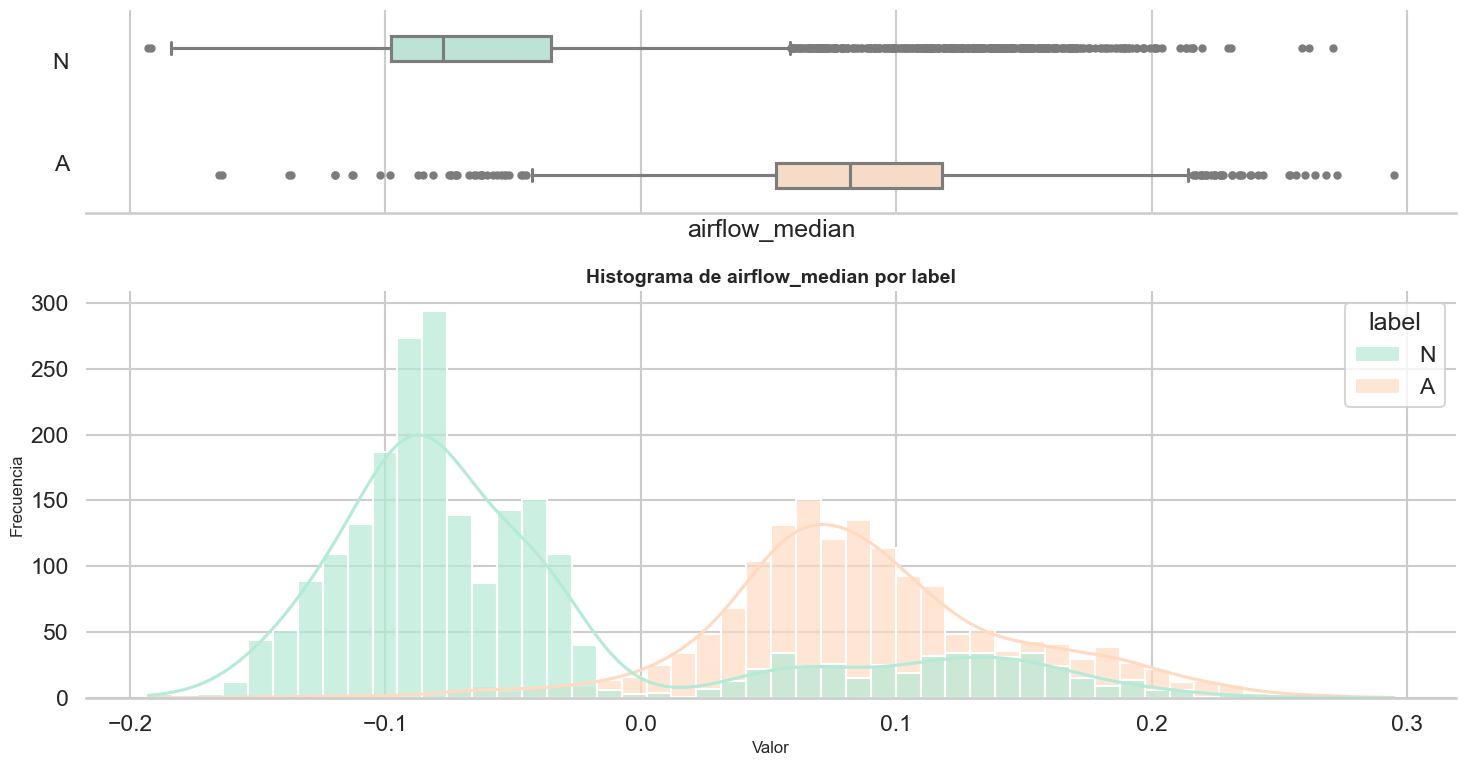


AIRFLOW_STD POR LABEL


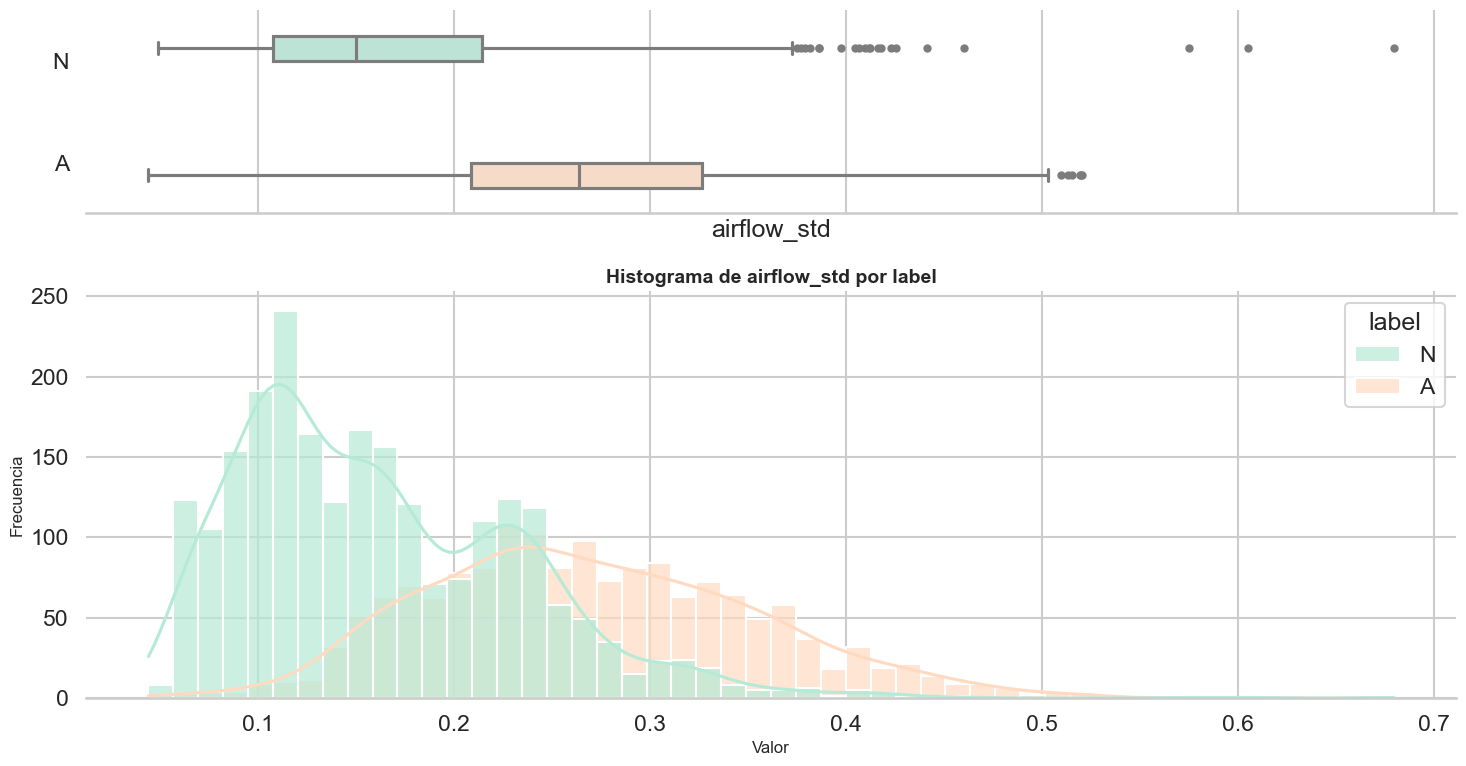


AIRFLOW_MEAN_PSD_0_0.1 POR LABEL


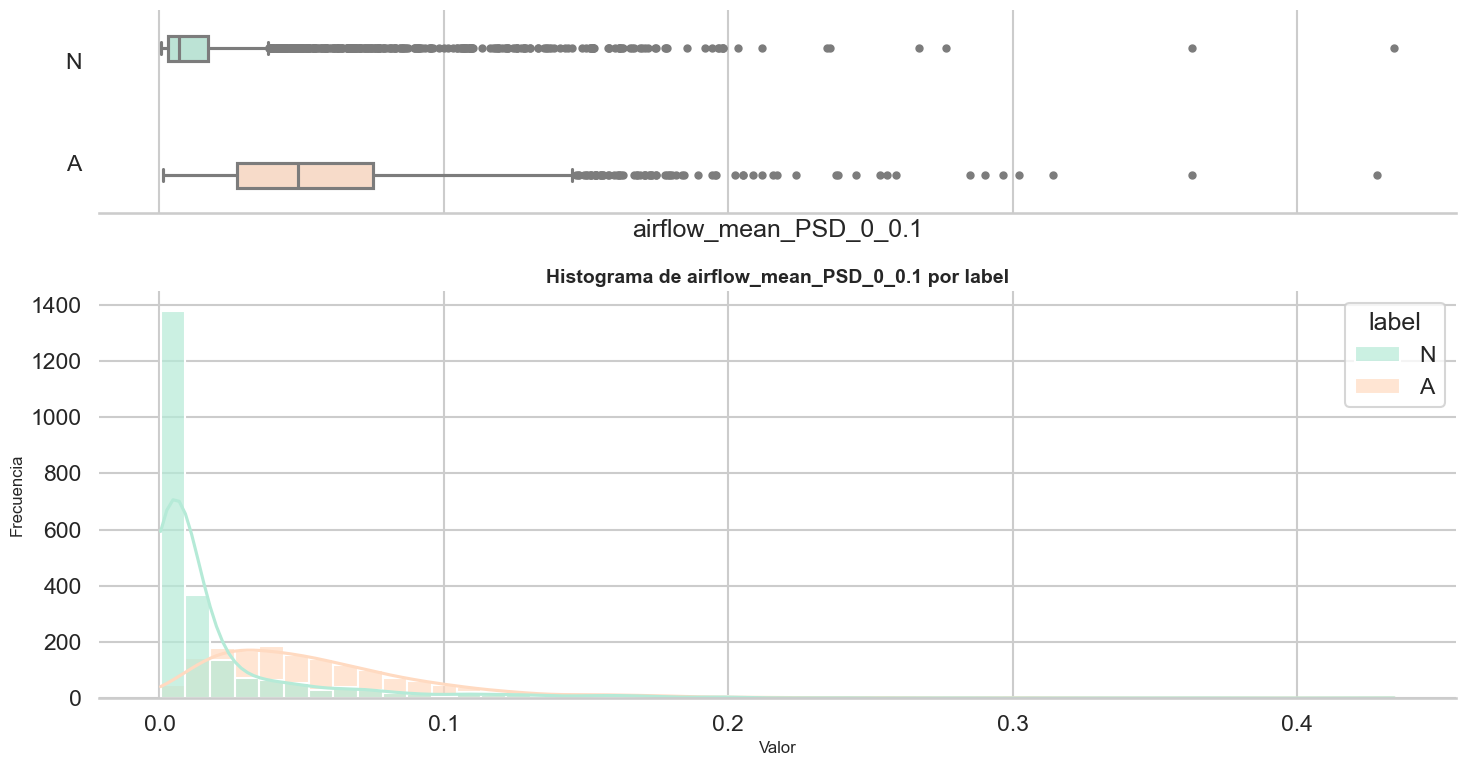


MEDIAN_RR POR LABEL


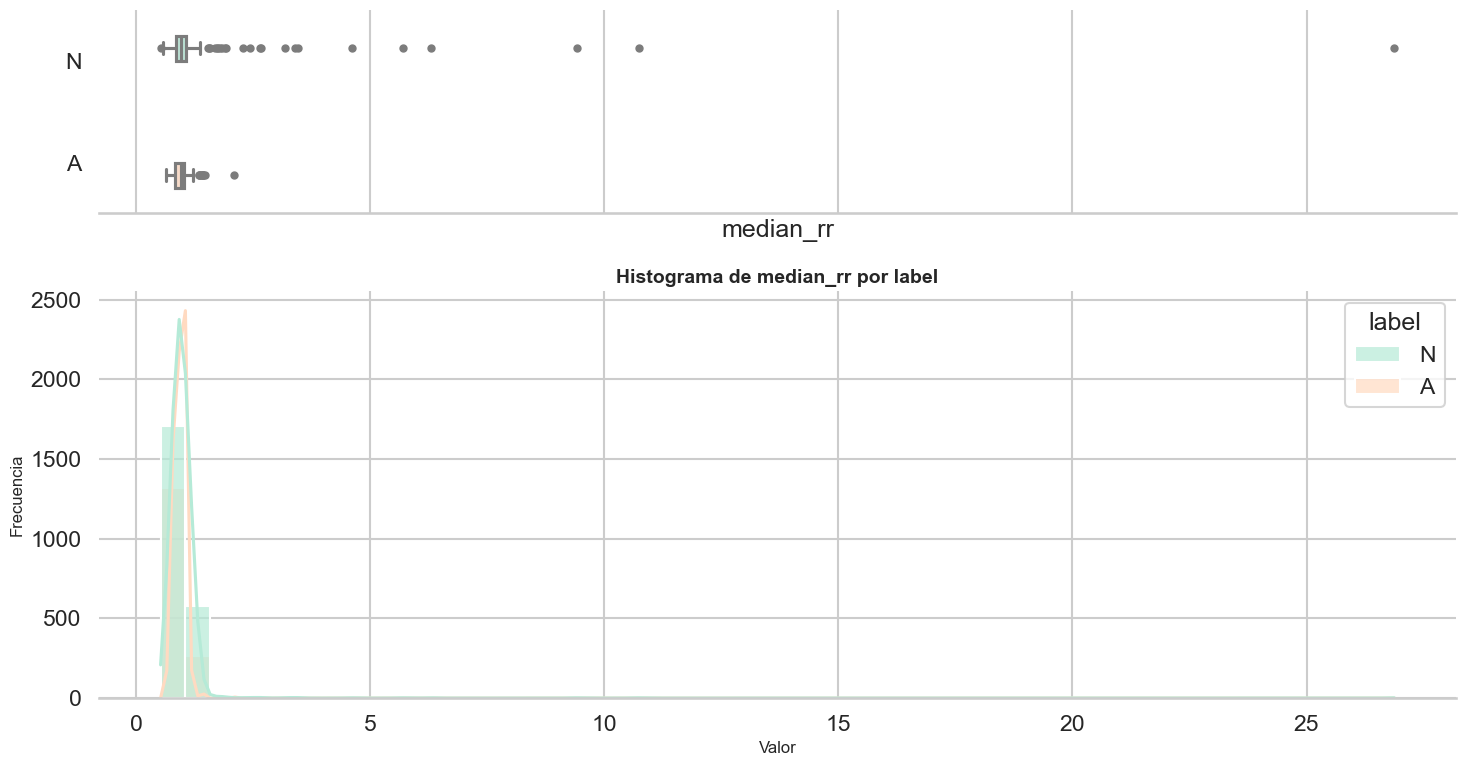


VAR_RR POR LABEL


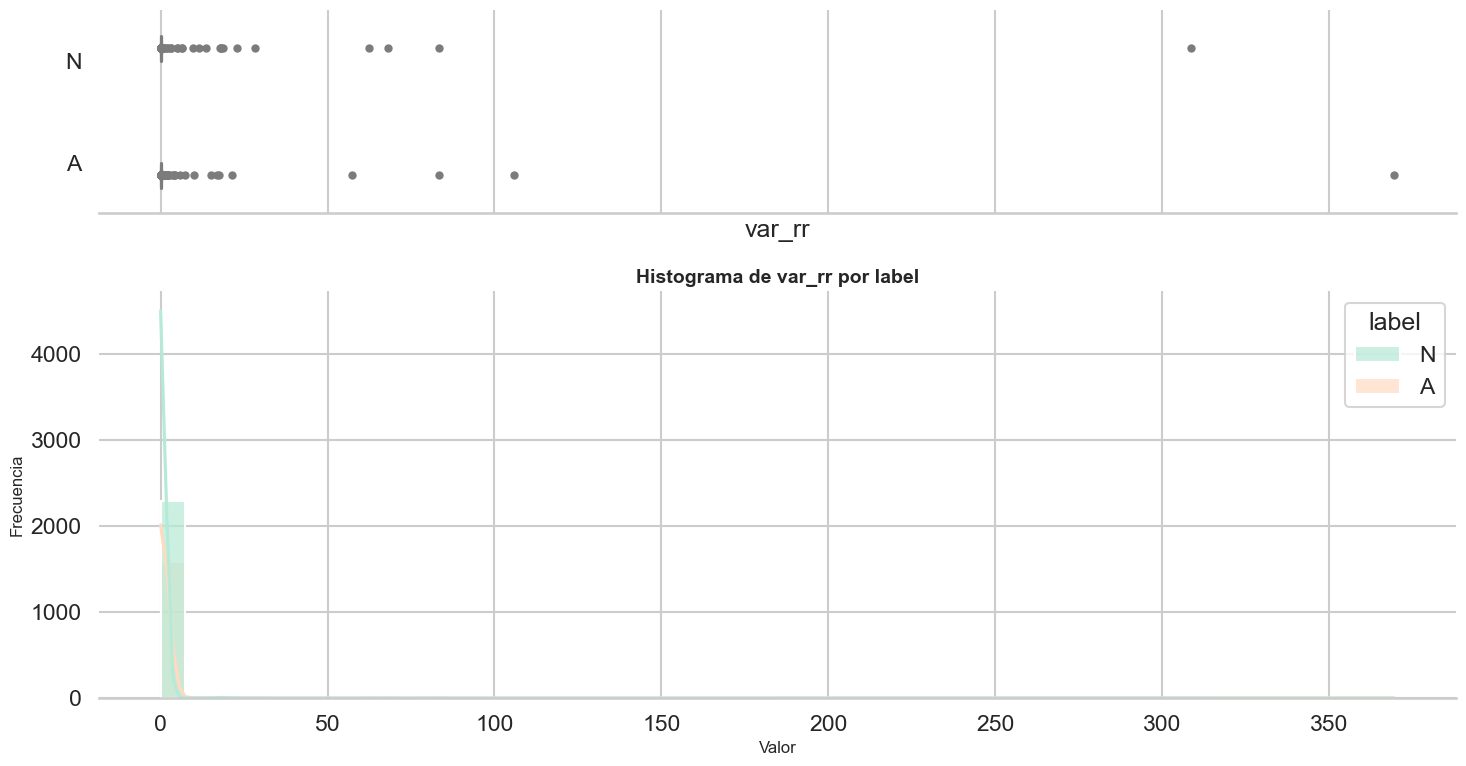


RMSSD POR LABEL


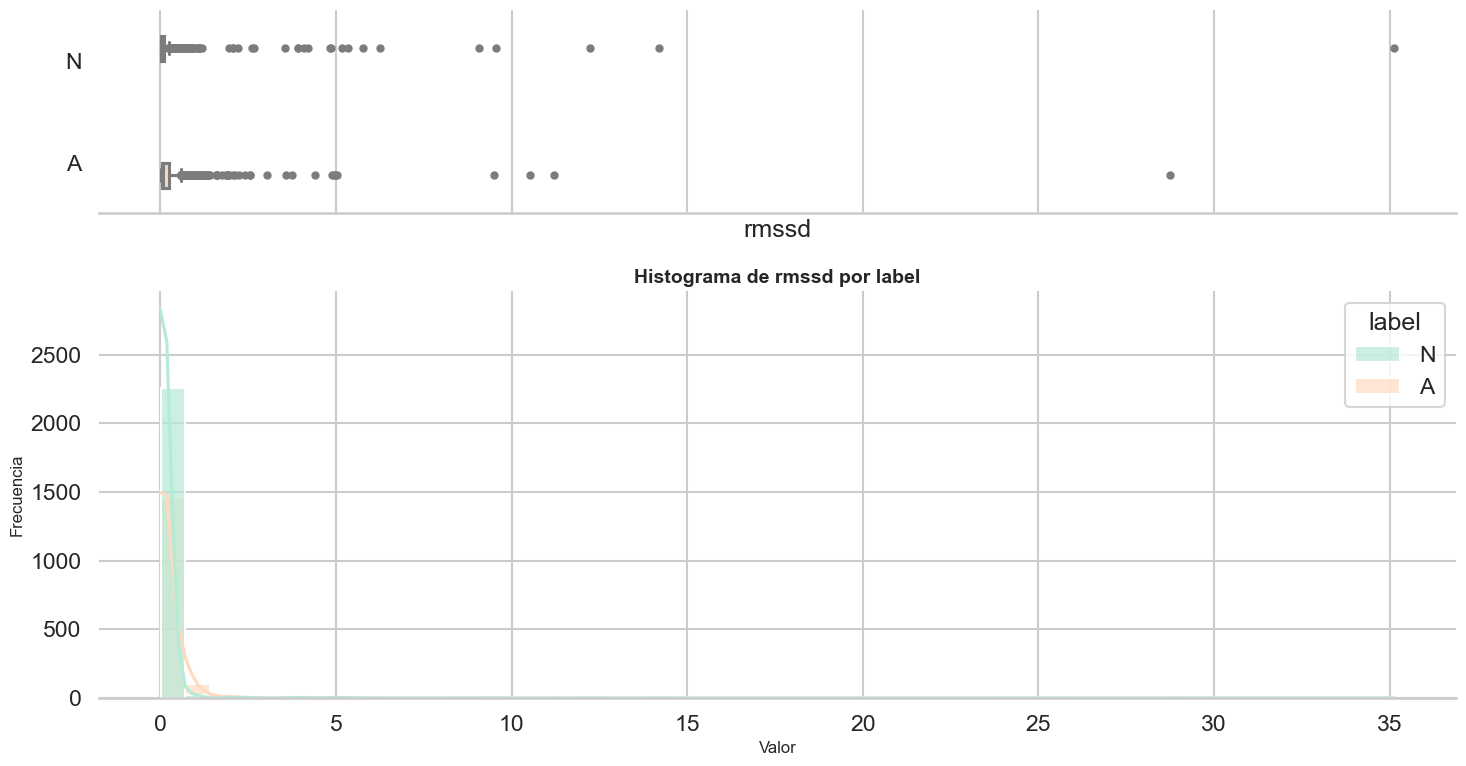

In [54]:
variables_clave = ['spo2_min', 'spo2_std','airflow_median', 'airflow_std', 'airflow_mean_PSD_0_0.1','median_rr', 'var_rr','rmssd']

#Color seleccionado para cada variable
color_palette = [
    "#A7C7E7",  # Light blue
    "#B5EAD7",  # Mint
    "#FFDAC1",  # Soft peach
    "#C7CEEA",  # Lavender
    "#F9E2AE",  # Pastel yellow
    "#FFC4D6",  # Light pink
    "#D5AAFF",  # Soft purple
    "#A8E6CF"   # Pastel green
]


# Genera subplots para cada variable
for i, col in enumerate(variables_clave):
    
    plot_variable_by_group(df, col,'label')

### **Visualización variable categórica agrupada según el estado: Apnea (A) o Sin evento (N)**

In [57]:
# Columna categórica 
category_col = 'Sex'

# Columna para agrupar los datos 
group_col = 'label'

# Contar el número de ocurrencias por combinación de categoría y grupo
df_counts = df.groupby([category_col, group_col], observed=False).size().reset_index(name="count")

# Crear un mapa de colores por defecto 
unique_groups = df[group_col].dropna().unique()
default_colors = ["#b5ead7", "#ffdac1", "#c7ceea", "#ffdd99", "#c2e0ff"]  # Paleta pastel suave
color_map = {group: default_colors[i % len(default_colors)] for i, group in enumerate(unique_groups)}

# Crear gráfico de barras agrupadas con Plotly Express
fig = px.bar(
    df_counts, 
    x=category_col,        # Eje X: la categoría principal (Sex)
    y="count",             # Eje Y: frecuencia de ocurrencias
    color=group_col,      
    barmode="group",       
    color_discrete_map=color_map  
)

# Configurar título y etiquetas de los ejes
fig.update_layout(
    title=dict(text=f"<b>Frecuencia de {category_col} según {group_col}</b>", font=dict(color="black")),
    xaxis_title=category_col,
    yaxis_title="Frecuencia",
    template="plotly_white"
)

# Mostrar la figura
fig.show()

<b> 2. Gráficos de dispersión para relaciones entre variables.</b><br>

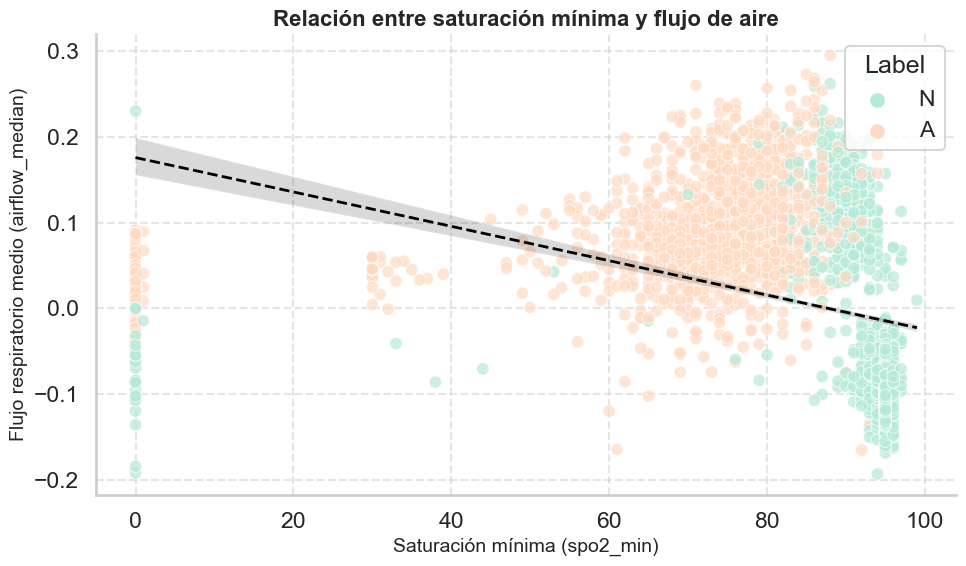

In [56]:
sns.set_style("whitegrid")  # Cuadrícula activa

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.scatterplot(
    data=df,
    x='spo2_min',
    y='airflow_median',
    hue='label',  # Diferencia Apnea (A) vs No Apnea (N)
    palette={'N':'#B5EAD7','A':'#FFDAC1'},
    alpha=0.7,
    s=80,         
    edgecolor='w' 
)

# Línea de tendencia general
sns.regplot(
    data=df,
    x='spo2_min',
    y='airflow_median',
    scatter=False,
    color='black',   # Línea negra
    line_kws={'linewidth':2, 'linestyle':'--'}
)

# Configuración de título y etiquetas
plt.title('Relación entre saturación mínima y flujo de aire', fontsize=16, fontweight='bold')
plt.xlabel('Saturación mínima (spo2_min)', fontsize=14)
plt.ylabel('Flujo respiratorio medio (airflow_median)', fontsize=14)

# Mejorar estética
plt.legend(title='Label', loc='upper right')
sns.despine()  # Quitar bordes superior y derecho
plt.grid(True, linestyle='--', alpha=0.5)  # Cuadrícula más sutil

plt.tight_layout()
plt.show()

<b>3. Breve interpretación de lo que muestran las gráficas.</b><br>

- **rmssd** y **var_rr**  
  Ambas variables presentan numerosos valores atípicos en ambos grupos. No se aprecia una diferencia visualmente relevante entre los grupos (con apnea vs. sin evento), manteniendo distribuciones similares.

- **median_rr**  
  El grupo sin evento muestra una cantidad considerable de valores atípicos, algunos muy alejados del valor central. Sin embargo, no se observan diferencias significativas

- **airflow_mean_PSD_0_0.1**  
  Se evidencia mayor dispersión en el grupo con apnea, acompañado de un rango intercuartílico más amplio. La mediana es marcadamente superior en este grupo:
  - *Sin evento:* `0.00686`  
  - *Con apnea:* `0.04856`

- **airflow_std**  
  Ambos grupos presentan un rango intercuartílico amplio, lo que indica que la variabilidad de la respiración dentro de cada grupo es alta. No obstante, la mediana en el grupo con apnea es superior, lo que sugiere una respiración más irregular:
  - *Sin evento:* `0.1499`  
  - *Con apnea:* `0.2637`

- **airflow_median**  
  Se observan diferencias claras entre grupos: la mediana en el grupo con apnea es positiva, mientras que en el grupo sin evento tiende a valores negativos. En ambos casos, la dispersión es notable:  
  - *Sin evento:* `-0.077`  
  - *Con apnea:* `0.082`

- **spo2_std**  
  Se identifican múltiples valores atípicos, con diferencias evidentes en la mediana entre los grupos:  
  - *Sin evento:* `0.4927`  
  - *Con apnea:* `6.16`

- **spo2_min**  
  Presenta numerosos valores atípicos y diferencias visuales marcadas en la mediana:  
  - *Sin evento:* `95`  
  - *Con apnea:* `26`

- **Género**  
  Predominancia de hombres:  
  - *Sin evento:* `1845`  
  - *Con apnea:* `1568`  
  En contraste, mujeres:  
  - *Sin evento:* `466`  
  - *Con apnea:* `19`

- **Relación spo2_min vs airflow_median**  
  La línea de regresión muestra **pendiente negativa**: a menor saturación mínima, menor flujo respiratorio medio.  
  - El grupo *sin eventos (N)* concentra valores altos de saturación mínima.  
  - El grupo *con apnea (A)* presenta mayor dispersión y valores bajos.

## <span style="color:#1a73e8;"><strong>5. Interpretaciones iniciales</strong></span>

1. ¿Qué tendencias o patrones básicos se observan?

- *Las variables relacionadas con la señal de flujo (airflow_mean_PSD_0_0.1, airflow_std, airflow_median) muestran diferencias más claras entre los grupos, especialmente en la mediana y en la distribución, sugiriendo que las características del flujo son relevantes para la detección de apnea*

- *spo2_std y spo2_min presentan diferencias marcadas entre los grupos, lo que confirma la relación entre apnea y desaturaciones de oxígeno.*

- *Variables como rmssd, var_rr y median_rr no evidencian diferencias relevantes entre grupos, lo que indica que los indicadores derivados de RR pueden no ser discriminantes en este contexto.*

2. ¿Qué limitaciones tiene la base de datos?
- *Desbalance de género: Hay una marcada predominancia de hombres, especialmente en el grupo con apnea (1568 hombres vs. 19 mujeres), lo que puede sesgar los resultados.*

- *Valores atípicos extremos: Muchas variables (ej. spo2_min, rmssd) presentan outliers que podrían influir en los análisis estadísticos*

- *Valores faltantes: Algunas variables presentan datos ausentes, especialmente en las métricas de variabilidad cardiaca (hrv_lf_power, hrv_hf_power, rmssd), con hasta 20 valores faltantes por variable, lo que puede requerir imputación*

- *Desbalance de clases: Aunque el desbalance no es extremo, existe diferencia entre los grupos: 2311 instancias sin apnea frente a 1587 con apnea, lo que podría afectar métricas de desempeño en análisis de clasificación.*


3. ¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?
- *Las características del flujo respiratorio (p. ej., airflow_std, airflow_median, airflow_mean_PSD_0_0.1) presentan diferencias notorias entre los grupos, lo que sugiere que estas variables podrían desempeñar un papel relevante en la discriminación entre apnea y no apnea.*

- *Variables de oximetría (spo2_min, spo2_std) tienen un papel determinante en la ocurrencia de los eventos, por lo que la combinación con airflow podría mejorar la precisión diagnóstica.*

- *Las métricas derivadas de RR (rmssd, var_rr, median_rr) no muestran diferencias significativas entre grupos, por lo que su poder discriminante en este contexto puede ser limitado.*

## <span style="color:#1a73e8;"><strong>6. Conclusiones</strong></span>

- *Este análisis exploratorio permite reconocer variables con mayor potencial explicativo, especialmente aquellas asociadas al flujo respiratorio y la saturación de oxígeno.*

- *El hallazgo sobre la baja discriminación de las métricas RR indica que será necesario un análisis más profundo para determinar su relevancia en la identificación de patrones.*

- *Detectar valores atípicos y diferencias en la dispersión ayuda a definir estrategias de preprocesamiento (normalización, tratamiento de outliers) para mejorar la calidad del análisis.*

- *La detección de valores nulos facilita la planificación del manejo de datos faltantes, crucial para asegurar la robustez del análisis.*

## <span style="color:#1a73e8;"><strong>7. Referencias</strong></span>

[1] D. Valecchi et al., «Prognostic Significance of Obstructive Sleep Apnea in a Population of Subjects with Interstitial Lung Diseases», Pulm. Ther., vol. 9, n.o 2, pp. 223-236, feb. 2023, doi: 10.1007/s41030-023-00215-1.

[2] S. Bottia, H. Barrios-Bermúdez, y D. Rosselli, «Prevalencia de apnea de sueño en Colombia: un análisis de las bases de datos del Ministerio de Salud», Iatreia, vol. 37, n.o 1, Art. n.o 1, 2024, doi: 10.17533/udea.iatreia.222.

[3] S. Surani y P. Taweesedt, «Obstructive Sleep Apnea: New Perspective», Medicina (Mex.), vol. 59, n.o 1, p. 75, dic. 2022, doi: 10.3390/medicina59010075.

[4] T. Penzel, G. B. Moody, R. G. Mark, A. L. Goldberger, y J. H. Peter, «Apnea-ECG Database». physio-net.org, 2000. doi: 10.13026/C23W2R.